<a href="https://colab.research.google.com/github/Smoulvad01/AI-C1-image-/blob/main/Inspecting_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>IMPORT</font>

This file inspects the data BEFORE any pre-processing steps are made. Afterward, we import and pre-process the images, and inspect them AFTERWARDS, to ensure that the pre-processing worked as intended.

In [ ]:
import cv2
from PIL import Image # To display images
from sklearn.decomposition import NMF, PCA
from collections import Counter

# TensorFlow and tf.keras
import tensorflow as tf
from keras.utils.vis_utils import plot_model

# Helper libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from collections import Counter
from PIL import Image
import os

reload(plt)
np.set_printoptions(suppress=True)
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='green'>Inspect the Image Data</font>

In [ ]:
file_path_folder_train = "/content/drive/MyDrive/dataset_new/train"
file_path_folder_test = "/content/drive/MyDrive/dataset_new/test"

# loading training data
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    file_path_folder_train,
#    validation_split=0.2,
#    subset= "training",
    seed=42,
#    image_size= (img_height, img_width),
#    batch_size=batch_size
)

# loading testing data
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    file_path_folder_test,
    #validation_split=0.2,
    #subset= "validation",
   seed=42,
#    image_size= (img_height, img_width),
#    batch_size=batch_size
)

Found 1234 files belonging to 2 classes.
Found 218 files belonging to 2 classes.


In [ ]:
# labeling to give classnames 
class_names = train_images.class_names
print(class_names)

['Closed', 'Open']


### Inspect Image Labels

In [ ]:
# For training data
train_class_counts = Counter()

for images, labels in train_images:
    train_class_counts.update(labels.numpy())

print("Training data class counts:", train_class_counts)

# For testing data
test_class_counts = Counter()

for images, labels in test_images:
    test_class_counts.update(labels.numpy())

print("Testing data class counts:", test_class_counts)

Training data class counts: Counter({1: 617, 0: 617})
Testing data class counts: Counter({1: 109, 0: 109})


### Visualize the Images

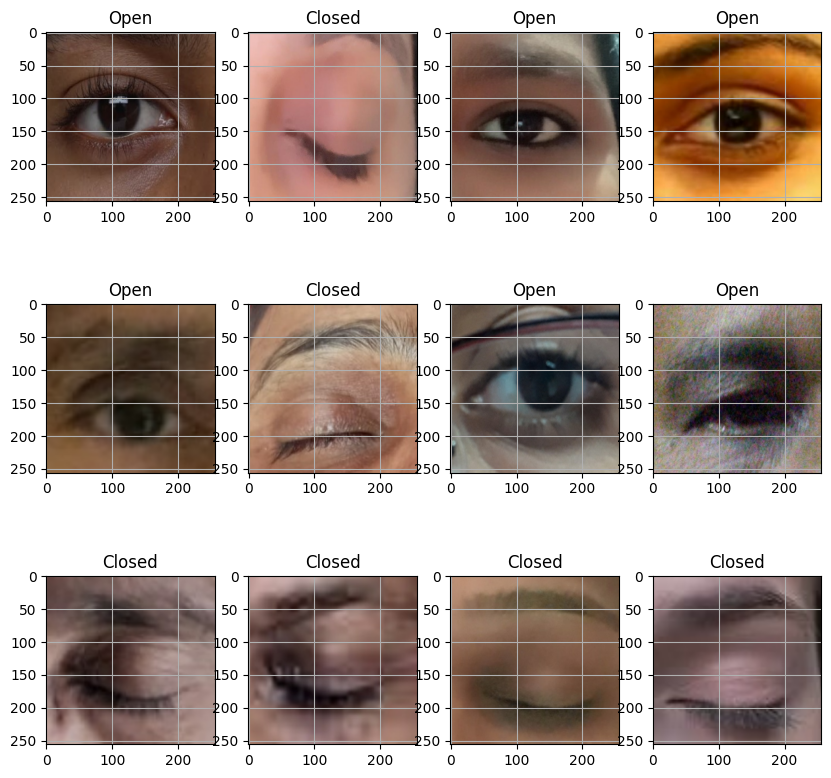

In [ ]:
# plotting to inspect images visually and check correct labelling 
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

### Inspect Batches created using Keras - Relevant for CNN

In [ ]:
# get the count of batches
# revisit later for what batch size we should have 
batch_count = tf.data.experimental.cardinality(train_images).numpy()
print("Number of batches: " + str(batch_count))

Number of batches: 39


In [ ]:
# inspect the batches
for images, labels in train_images.take(1):
    print(images.shape) #(1) denotes the number of images in the batch. (2) denotes the height and width of each image in pixels.(4) denotes the number of color channels in each image, which is typically RGB (red, green, blue) or grayscale.
    print(images.dtype)
    print(labels.shape)
    print(labels.dtype)

(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>


### Check Image Sizes

In [ ]:
# check for smallest and largest image 
from PIL import Image
import os

# Initialize variables to hold the smallest and largest images
smallest_image = None
largest_image = None

smallest_image_size = float('inf')  # set initial smallest size to infinity
largest_image_size = float('-inf')  # set initial largest size to negative infinity

# Iterate over all images in the specified directory
for filename in os.listdir(file_path_folder_train+"/Open/"):
    #if filename.endswith(".jpg") or filename.endswith(".png"):  # add more file types if needed
    img = Image.open(os.path.join(file_path_folder_train+"/Open/", filename))
    width, height = img.size
    image_size = width * height  # total pixel count
    #print("Debug: Image size: " + str(image_size))
    # Check if current image is the smallest one
    if image_size < smallest_image_size:
        smallest_image_size = image_size
        smallest_image = img

    # Check if current image is the largest one
    if image_size > largest_image_size:
        largest_image_size = image_size
        largest_image = img

print("Largest image size: " + str(largest_image_size))
print("Smallest image size: " + str(smallest_image_size))
# Now smallest_image and largest_image hold the smallest and largest images respectively.

Largest image size: 2293710
Smallest image size: 2250


### Statistics on Dataset Images

In [ ]:
def image_sizes(directory):
    sizes = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        width, height = img.size
        sizes.append(width * height)
    return sizes

# Calculate sizes
sizes_train_open = image_sizes(file_path_folder_train+"/Open/")
sizes_train_closed = image_sizes(file_path_folder_train+"/Closed/")
sizes_test_open = image_sizes(file_path_folder_test+"/Open/")
sizes_test_closed = image_sizes(file_path_folder_test+"/Closed/")

# Calculate statistics
def calculate_statistics(sizes):
    return {
        'mean': np.mean(sizes),
        'median': np.median(sizes),
        'min': np.min(sizes),
        'max': np.max(sizes),
        'std': np.std(sizes),
    }

# Print statistics
for name, sizes in [('Train/Open', sizes_train_open), 
                    ('Train/Closed', sizes_train_closed), 
                    ('Test/Open', sizes_test_open), 
                    ('Test/Closed', sizes_test_closed)]:
    stats = calculate_statistics(sizes)
    print(f"Image size statistics in {name}: ")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")

Image size statistics in Train/Open: 
  mean: 142565.2414910859
  median: 96900.0
  min: 2250
  max: 2293710
  std: 206027.72118035448
Image size statistics in Train/Closed: 
  mean: 169454.55591572123
  median: 92700.0
  min: 4158
  max: 2640625
  std: 305579.4969638155
Image size statistics in Test/Open: 
  mean: 146018.79816513762
  median: 95100.0
  min: 3960
  max: 1638400
  std: 215512.52309630506
Image size statistics in Test/Closed: 
  mean: 163292.22018348624
  median: 91800.0
  min: 4928
  max: 1638400
  std: 273434.65731457766


### Check For Corrupted Images

In [ ]:
def get_all_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):  # Add/modify file extensions to suit your dataset
                image_paths.append(os.path.join(root, file))
    return image_paths

corrupted_images = []

# Obtain all image paths from training and testing directories
all_image_paths = get_all_image_paths(file_path_folder_train) + get_all_image_paths(file_path_folder_test)

for img_path in all_image_paths:
    try:
        img = Image.open(img_path)
        img.verify()  # This will raise an exception if the image is not valid
    except (IOError, SyntaxError) as e:
        corrupted_images.append(img_path)

print(f"Number of corrupted images: {len(corrupted_images)}")

Number of corrupted images: 0
